In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

In [14]:
from torchvision.models import vgg16_bn,VGG16_BN_Weights
modelold = vgg16_bn()
print(modelold)
# for name, child in model.named_children():
#     print(name)
#     print(child)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [4]:
from torchvision.models import vgg19_bn , VGG19_BN_Weights
import torch.nn.functional as F

model=vgg19_bn()

for name, child in model.named_children():
    print(name)
    print(child)

features
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU(inplace=True)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), pad

In [5]:
import torch
if torch.cuda.is_available():
    device=torch.device('cuda')

print(device)

cuda


In [6]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.transforms import Normalize, ToTensor, Compose

In [7]:
import torch.nn as nn
import torch.nn.functional as F
class UNET(nn.Module):  
    def __init__(self, encoder, center, decoder):
        super().__init__()
        self.encoder = encoder
        self.center = center
        self.decoder = decoder
        
    def forward(self, x):
        encoder_outputs = self.encoder(x)
        center_output = self.center(encoder_outputs[-1])
        decoder_output = self.decoder(center_output, encoder_outputs)

        return decoder_output

In [8]:
class Encoder(nn.Module):
    def __init__(self, pretrained_network):
        super().__init__()
        self.encoder = pretrained_network
        
    def forward(self, x):
        encoder_outputs = []
        
        for layers in self.encoder.features:
            x = layers(x)
            encoder_outputs.append(x)
            
        return encoder_outputs

In [9]:
# class Encoder(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.r=nn.ReLU()
#         self.conv1_1=nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3,padding=1)
#         self.bn1_1=nn.BatchNorm2d(num_features=64)
#         self.conv1_2=nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,padding=1)
#         self.bn1_2=nn.BatchNorm2d(num_features=64)
#         self.conv1_3=nn.Conv2d(in_channels=64,out_channels=64,kernel_size=3,padding=1)
#         self.bn1_3=nn.BatchNorm2d(num_features=64)
        
#         self.mp2=nn.MaxPool2d(kernel_size=(2,2),stride=2)
#         self.conv2_1=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
#         self.bn2_1=nn.BatchNorm2d(num_features=128)
#         self.conv2_2=nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,padding=1)
#         self.bn2_2=nn.BatchNorm2d(num_features=128)
#         self.conv2_3=nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,padding=1)
#         self.bn2_3=nn.BatchNorm2d(num_features=128)
#         self.conv2_4=nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3,padding=1)
#         self.bn2_4=nn.BatchNorm2d(num_features=128)
        
#         self.mp3=nn.MaxPool2d(kernel_size=(2,2),stride=2)
#         self.conv3_1=nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,padding=1)
#         self.bn3_1=nn.BatchNorm2d(num_features=256)
#         self.conv3_2=nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,padding=1)
#         self.bn3_2=nn.BatchNorm2d(num_features=256)       
#         self.conv3_3=nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,padding=1)
#         self.bn3_3=nn.BatchNorm2d(num_features=256)
        
#         self.mp4=nn.MaxPool2d(kernel_size=(2,2),stride=2)
#         self.conv4_1=nn.Conv2d(in_channels=256,out_channels=512,kernel_size=3,padding=1)
#         self.bn4_1=nn.BatchNorm2d(num_features=512)
#         self.conv4_2=nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,padding=1)
#         self.bn4_2=nn.BatchNorm2d(num_features=512)
#         self.conv4_3=nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,padding=1)
#         self.bn4_3=nn.BatchNorm2d(num_features=512)
        
#         self.mp5=nn.MaxPool2d(kernel_size=(2,2),stride=2)
        
#     def forward(self,x):
#         encoder_features_outputs=[]
        
#         x=self.conv1_1(x)
#         encoder_features_outputs.append(x) #0
#         x=self.bn1_1(x)
#         encoder_features_outputs.append(x) #1
#         x=self.r(x)
#         encoder_features_outputs.append(x) #2
#         x=self.conv1_2(x)
#         encoder_features_outputs.append(x) #3
#         x=self.bn1_2(x)
#         encoder_features_outputs.append(x) #4
#         x=self.r(x)
#         encoder_features_outputs.append(x) #5
#         x=self.conv1_3(x)
#         encoder_features_outputs.append(x) #6
#         x=self.bn1_3(x)
#         encoder_features_outputs.append(x) #7
#         x=self.r(x)
#         encoder_features_outputs.append(x) #8
        
#         x=self.mp2(x)
#         encoder_features_outputs.append(x) #9
#         x=self.conv2_1(x)
#         encoder_features_outputs.append(x) #10
#         x=self.bn2_1(x)
#         encoder_features_outputs.append(x) #11
#         x=self.r(x)
#         encoder_features_outputs.append(x) #12
#         x=self.conv2_2(x)
#         encoder_features_outputs.append(x) #13
#         x=self.bn2_2(x)
#         encoder_features_outputs.append(x) #14
#         x=self.r(x)
#         encoder_features_outputs.append(x) #15
#         x=self.conv2_3(x)
#         encoder_features_outputs.append(x) #16
#         x=self.bn2_3(x)
#         encoder_features_outputs.append(x) #17
#         x=self.r(x)
#         encoder_features_outputs.append(x) #18
#         x=self.conv2_4(x)
#         encoder_features_outputs.append(x) #19
#         x=self.bn2_4(x)
#         encoder_features_outputs.append(x) #20
#         x=self.r(x)
#         encoder_features_outputs.append(x) #21
        
#         x=self.mp3(x)
#         encoder_features_outputs.append(x) #22
#         x=self.conv3_1(x)
#         encoder_features_outputs.append(x) #23
#         x=self.bn3_1(x)
#         encoder_features_outputs.append(x) #24
#         x=self.r(x)
#         encoder_features_outputs.append(x) #25
#         x=self.conv3_2(x)
#         encoder_features_outputs.append(x) #26
#         x=self.bn3_2(x)
#         encoder_features_outputs.append(x) #27
#         x=self.r(x)
#         encoder_features_outputs.append(x) #28
#         x=self.conv3_3(x)
#         encoder_features_outputs.append(x) #29
#         x=self.bn3_3(x)
#         encoder_features_outputs.append(x) #30
#         x=self.r(x)
#         encoder_features_outputs.append(x) #31
        
#         x=self.mp4(x)
#         encoder_features_outputs.append(x) #32
#         x=self.conv4_1(x)
#         encoder_features_outputs.append(x) #33
#         x=self.bn4_1(x)
#         encoder_features_outputs.append(x) #34
#         x=self.r(x)
#         encoder_features_outputs.append(x) #35
#         x=self.conv4_2(x)
#         encoder_features_outputs.append(x) #36
#         x=self.bn4_2(x)
#         encoder_features_outputs.append(x) #37
#         x=self.r(x)
#         encoder_features_outputs.append(x) #38
#         x=self.conv4_3(x)
#         encoder_features_outputs.append(x) #39
#         x=self.bn4_3(x)
#         encoder_features_outputs.append(x) #40
#         x=self.r(x)
#         encoder_features_outputs.append(x) #41
        
#         x=self.mp5(x)
#         encoder_features_outputs.append(x) #42
        
#         return encoder_features_outputs

In [13]:
class Center(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 512, out_channels = 1024, kernel_size = (3,3), padding = 1)
        self.bn1 = nn.BatchNorm2d(1024)
        self.conv2 = nn.Conv2d(in_channels = 1024, out_channels = 1024, kernel_size = (3,3), padding = 1)
        self.bn2 = nn.BatchNorm2d(1024)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        
        return x

In [11]:
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.conv5_up = nn.Conv2d(in_channels = 1024, out_channels = 512, kernel_size = (3,3), padding = 1)
        self.conv5_1 = nn.Conv2d(in_channels = 1024, out_channels = 512, kernel_size = (3,3), padding = 1)
        self.bn5_1 = nn.BatchNorm2d(512)
        self.conv5_2 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = (3,3), padding = 1)
        self.bn5_2 = nn.BatchNorm2d(512)
        self.conv5_3 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = (3,3), padding = 1)
        self.bn5_3 = nn.BatchNorm2d(512)
        self.conv5_4 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = (3,3), padding = 1)
        self.bn5_4 = nn.BatchNorm2d(512)
        
        self.conv4_up = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = (3,3), padding = 1)
        self.conv4_1 = nn.Conv2d(in_channels = 1024, out_channels = 512, kernel_size = (3,3), padding = 1)
        self.bn4_1 = nn.BatchNorm2d(512)
        self.conv4_2 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = (3,3), padding = 1)
        self.bn4_2 = nn.BatchNorm2d(512)
        self.conv4_3 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = (3,3), padding = 1)
        self.bn4_3 = nn.BatchNorm2d(512)
        self.conv4_4 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = (3,3), padding = 1)
        self.bn4_4 = nn.BatchNorm2d(512)
        
        self.conv3_up = nn.Conv2d(in_channels = 512, out_channels = 256, kernel_size = (3,3), padding = 1)
        self.conv3_1 = nn.Conv2d(in_channels = 512, out_channels = 256, kernel_size = (3,3), padding = 1)
        self.bn3_1 = nn.BatchNorm2d(256)
        self.conv3_2 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (3,3), padding = 1)
        self.bn3_2 = nn.BatchNorm2d(256)
        self.conv3_3 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (3,3), padding = 1)
        self.bn3_3 = nn.BatchNorm2d(256)
        self.conv3_4 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = (3,3), padding = 1)
        self.bn3_4 = nn.BatchNorm2d(256)
        
        self.conv2_up = nn.Conv2d(in_channels = 256, out_channels = 128, kernel_size = (3,3), padding = 1)
        self.conv2_1 = nn.Conv2d(in_channels = 256, out_channels = 128, kernel_size = (3,3), padding = 1)
        self.bn2_1 = nn.BatchNorm2d(128)
        self.conv2_2 = nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = (3,3), padding = 1)
        self.bn2_2 = nn.BatchNorm2d(128)
        
        self.conv1_up = nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = (3,3), padding = 1)
        self.conv1_1 = nn.Conv2d(in_channels = 128, out_channels = 64, kernel_size = (3,3), padding = 1)
        self.bn1_1 = nn.BatchNorm2d(64)
        self.conv1_2 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = (3,3), padding = 1)
        self.bn1_2 = nn.BatchNorm2d(64)
        
        self.conv_final = nn.Conv2d(in_channels = 64, out_channels = 2, kernel_size = (1,1))
        
    def forward(self, x, encoder_outputs):
        x = F.interpolate(x, scale_factor = 2, mode = 'nearest') #double the spatial extent
        x = self.conv5_up(x) #reduce no. of channels
        x = self.relu(x)
        x = torch.cat((x, encoder_outputs[51]), dim = 1) #concatenate with skip connections
        x = self.conv5_1(x)
        x = self.bn5_1(x)
        x = self.relu(x)
        x = self.conv5_2(x)
        x = self.bn5_2(x)
        x = self.relu(x)
        x = self.conv5_3(x)
        x = self.bn5_3(x)
        x = self.relu(x)
        x = self.conv5_4(x)
        x = self.bn5_4(x)
        x = self.relu(x)
        
        x = F.interpolate(x, scale_factor = 2, mode = 'nearest')
        x = self.conv4_up(x)
        x = self.relu(x)
        x = torch.cat((x, encoder_outputs[38]), dim = 1)
        x = self.conv4_1(x)
        x = self.bn4_1(x)
        x = self.relu(x)
        x = self.conv4_2(x)
        x = self.bn4_2(x)
        x = self.relu(x)
        x = self.conv4_3(x)
        x = self.bn4_3(x)
        x = self.relu(x)
        x = self.conv4_4(x)
        x = self.bn4_4(x)
        x = self.relu(x)
        
        x = F.interpolate(x, scale_factor = 2, mode = 'nearest')
        x = self.conv3_up(x)
        x = self.relu(x)
        x = torch.cat((x, encoder_outputs[25]), dim = 1)
        x = self.conv3_1(x)
        x = self.bn3_1(x)
        x = self.relu(x)
        x = self.conv3_2(x)
        x = self.bn3_2(x)
        x = self.relu(x)
        x = self.conv3_3(x)
        x = self.bn3_3(x)
        x = self.relu(x)
        x = self.conv3_4(x)
        x = self.bn3_4(x)
        x = self.relu(x)
        
        x = F.interpolate(x, scale_factor = 2, mode = 'nearest')
        x = self.conv2_up(x)
        x = self.relu(x)
        x = torch.cat((x, encoder_outputs[12]), dim = 1)
        x = self.conv2_1(x)
        x = self.bn2_1(x)
        x = self.relu(x)
        x = self.conv2_2(x)
        x = self.bn2_2(x)
        x = self.relu(x)
        
        x = F.interpolate(x, scale_factor = 2, mode = 'nearest')
        x = self.conv1_up(x)
        x = self.relu(x)
        x = torch.cat((x, encoder_outputs[5]), dim = 1)
        x = self.conv1_1(x)
        x = self.bn1_1(x)
        x = self.relu(x)
        x = self.conv1_2(x)
        x = self.bn1_2(x)
        x = self.relu(x)
        
        x = self.conv_final(x)
        
        return x

In [12]:
def reshape(path):
    original_image = Image.open(path)
    reshaped_image = original_image.resize((512,512), PIL.Image.NEAREST)
    return reshaped_image

Image Type: <class 'PIL.TiffImagePlugin.TiffImageFile'>
Mask Type: <class 'PIL.GifImagePlugin.GifImageFile'>
Image Shape:  (584, 565, 3)
Mask Sahpe:  (584, 565)
Unique values in Mask: [  0 255]
Image Data Type: uint8
Mask Data Type: uint8
New Image Shape:  (512, 512, 3)
New Mask Shape:  (512, 512)
Unique values in new Mask: [  0 255]


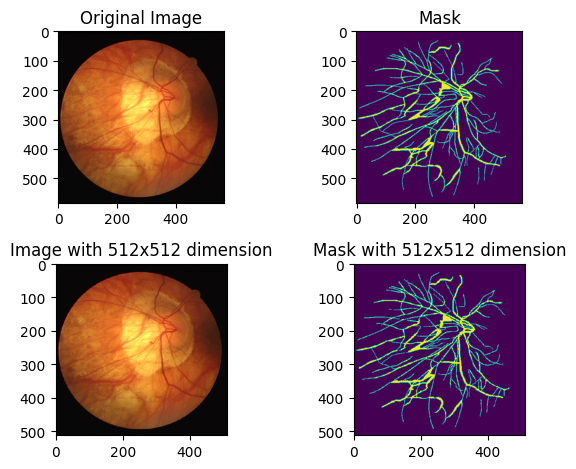

In [15]:
import os
import PIL
from PIL import Image

img = Image.open('/kaggle/input/sai-vessel-segmentation2/all/train/34_training.tif')
mask = Image.open('/kaggle/input/sai-vessel-segmentation2/all/train/34_manual1.gif')

print("Image Type:", type(img))
print("Mask Type:", type(mask))
print("Image Shape: ",np.array(img).shape)
print("Mask Sahpe: ",np.array(mask).shape)

print("Unique values in Mask:",np.unique(mask))
print("Image Data Type:", np.array(img).dtype)
print("Mask Data Type:", np.array(mask).dtype)

imgnew = reshape('/kaggle/input/sai-vessel-segmentation2/all/train/34_training.tif')
masknew = reshape('/kaggle/input/sai-vessel-segmentation2/all/train/34_manual1.gif')
print("New Image Shape: ",np.array(imgnew).shape)
print("New Mask Shape: ",np.array(masknew).shape)
print("Unique values in new Mask:",np.unique(masknew))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(2, 2, 2)
plt.title("Mask")
plt.imshow(mask)

plt.subplot(2, 2, 3)
plt.title("Image with 512x512 dimension")
plt.imshow(imgnew)

plt.subplot(2, 2, 4)
plt.title("Mask with 512x512 dimension")
plt.imshow(masknew)

plt.tight_layout()
plt.show()


In [16]:
class TrainDataset(Dataset):
    def __init__(self, path, transform = None):
        super().__init__()
        self.path = path
        _,_,self.files = next(os.walk(path))
        self.length = int(len(self.files)/2) - 4
        self.transform = Compose([ToTensor(), Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])
        
    def __len__(self):
        return self.length
    
    def __getitem__(self, idx):
        idx = idx + 21
        path = self.path + str(idx) + "_training.tif"
        img = reshape(path)
        img = self.transform(img)
        
        path = self.path + str(idx) + "_manual1.gif"
        mask = reshape(path)
        mask = np.array(mask)
        mask = torch.from_numpy(mask).type(torch.long)
        mask[mask == 255] = 1
        
        return img,mask
    
class ValidationDataset(Dataset):
    def __init__(self, path, transform = None):
        super().__init__()
        self.path = path
        _,_,self.files = next(os.walk(path))
        self.length = int(len(self.files)/2) - 16
        self.transform = Compose([ToTensor(), Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])
        
    def __len__(self):
        return self.length
    
    def __getitem__(self, idx):
        idx = idx + 37
        path = self.path + str(idx) + "_training.tif"
        img = reshape(path)
        img = self.transform(img)
        
        path = self.path + str(idx) + "_manual1.gif"
        mask = reshape(path)
        mask = np.array(mask)
        mask = torch.from_numpy(mask).type(torch.long)
        mask[mask == 255] = 1
        
        return img,mask

In [17]:
train_dataset = TrainDataset("/kaggle/input/sai-vessel-segmentation2/all/train/")
validation_dataset = ValidationDataset("/kaggle/input/sai-vessel-segmentation2/all/train/")

batch_size = 4
train_dataloader = DataLoader(train_dataset, batch_size, shuffle = True)
validation_dataloader = DataLoader(validation_dataset, batch_size)

Image Shape: torch.Size([3, 512, 512]) Mask Shape: torch.Size([512, 512]) Image dtype: torch.float32 Mask dtype: torch.int64
Unique values in Mask: [0 1]
torch.Size([512, 512, 3])


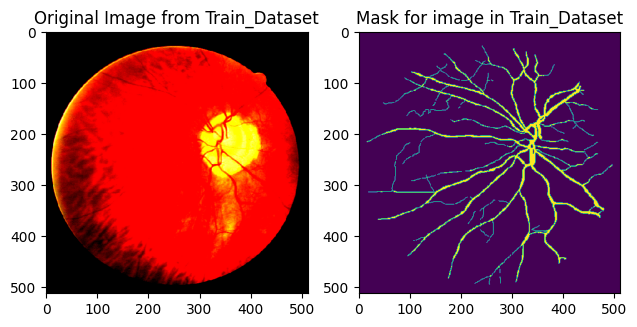

In [29]:
img,mask=train_dataset[10]

print("Image Shape:",img.shape,"Mask Shape:",mask.shape,"Image dtype:",img.dtype, "Mask dtype:", mask.dtype)
print("Unique values in Mask:",np.unique(mask))

plt.subplot(1,2,1)
plt.title("Original Image from Train_Dataset")
print(torch.permute(img,(1,2,0)).shape)
plt.imshow(torch.permute(img,(1,2,0)))

plt.subplot(1,2,2)
plt.title("Mask for image in Train_Dataset")
plt.imshow(mask)
plt.tight_layout()
plt.show()

In [19]:
def train_one_epoch(dataloader, model, loss_fn, optimizer):
    model.train()
    track_loss = 0
    XintY = 0
    X = 0
    Y = 0
    for i, (imgs, masks) in enumerate(dataloader):
        imgs = imgs.to(device)
        masks = masks.to(device)
        
        preds = model(imgs)
        
        loss = loss_fn(preds,masks)
        
        track_loss += loss.item()
        
        predclass = torch.argmax(preds,dim=1)
        
        Y += predclass.sum().item()  #predicted masks
        X += masks.sum().item()  #true positive
        
        
        predclass[predclass==0] = 2 #only need to compare 1's
        
        XintY += (predclass==masks).type(torch.float).sum().item()
        
        print("Trainig Batch",i+1,":","2*XintY:",2*XintY,"X:",X,"Y:",Y, "X+Y:",X+Y)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss = round(track_loss/(i+1),2)
        running_dice_coef = round(((2*XintY)/(X+Y)),2)
        
        print("Training Batch", i+1,":","/",len(dataloader), "Running Loss:",running_loss, "Running Dice_Coef:",running_dice_coef)
            
    epoch_loss = running_loss
    epoch_dice_coef = running_dice_coef    
    return epoch_loss, epoch_dice_coef


def validation_one_epoch(dataloader, model,loss_fn):
    model.eval()
    track_loss = 0
    XintY = 0
    X = 0
    Y = 0
    with torch.no_grad():
        for i, (imgs, masks) in enumerate(dataloader):
            imgs = imgs.to(device)
            masks = masks.to(device)
            
            preds = model(imgs)
            
            loss = loss_fn(preds,masks)
            
            track_loss += loss.item()
            
            predclass = torch.argmax(preds,dim=1)
            
            Y += predclass.sum().item()
            X += masks.sum().item()
            
            predclass[predclass==0] = 2
            
            XintY += (predclass==masks).type(torch.float).sum().item()
            
            print("Validation Batch",i+1,":","2*XintY:",2*XintY,"X:",X,"Y:",Y, "X+Y:",X+Y)
            

            running_loss = round(track_loss/(i+1),2)
            running_dice_coef = round(((2*XintY)/(X+Y)),2)
            
            print("Validation Batch", i+1,":","/",len(dataloader), "Running Loss:",running_loss, "Running Dice_Coef:",running_dice_coef)
            
    epoch_loss = running_loss
    epoch_dice_coef = running_dice_coef    
    return epoch_loss, epoch_dice_coef

In [20]:
print(device)

cuda


In [21]:
torch.cuda.empty_cache()

In [22]:
# pretrained_network=vgg16_bn(weights=VGG16_BN_Weights.DEFAULT)

# for param in pretrained_network.features.parameters():
#     param.requires_grad=False

# encoder=Encoder(pretrained_network).to(device)
# center=Center().to(device)
# decoder=Decoder().to(device)

# model=Unet(encoder,center, decoder).to(device)

# loss_fn=nn.CrossEntropyLoss()
# lr=0.001
# optimizer=torch.optim.Adam(params=model.parameters(), lr=lr)
# n_epochs=20

# for i in range(n_epochs):
#     print("Epoch No:",i+1)
#     train_epoch_loss, train_epoch_dice_coef=train_one_epoch(train_dataloader,model,loss_fn,optimizer)
#     print("Training Epoch Loss:", train_epoch_loss, "Training Epoch Dice_Coef:", train_epoch_dice_coef)
#     val_epoch_loss, val_epoch_dice_coef=val_one_epoch(val_dataloader,model,loss_fn)
#     print("Validation Epoch Loss:", val_epoch_loss, "Validation Epoch Dice_Coef:", val_epoch_dice_coef)
#     print("--------------------------------------------------")


# for param in pretrained_network.features.parameters():
#     param.requires_grad=True

# n_epochs=40  
# for i in range(n_epochs):
#     print("Epoch No:",i+1)
#     train_epoch_loss, train_epoch_dice_coef=train_one_epoch(train_dataloader,model,loss_fn,optimizer)
#     print("Training Epoch Loss:", train_epoch_loss, "Training Epoch Dice_Coef:", train_epoch_dice_coef)
#     val_epoch_loss, val_epoch_dice_coef=val_one_epoch(val_dataloader,model,loss_fn)
#     print("Validation Epoch Loss:", val_epoch_loss, "Validation Epoch Dice_Coef:", val_epoch_dice_coef)
#     print("--------------------------------------------------")

In [23]:
pretrained_network = vgg19_bn(weights = VGG19_BN_Weights.DEFAULT)

for param in pretrained_network.features.parameters():
    param.requires_grad = False

encoder = Encoder(pretrained_network).to(device)
center = Center().to(device)
decoder = Decoder().to(device)

model = UNET(encoder,center, decoder).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.001)
epochs =20

#first train newly added layers
for i in range(epochs):
    print("Epoch No:",i+1)
    train_epoch_loss, train_epoch_dice_coef=train_one_epoch(train_dataloader,model,loss_fn,optimizer)
    print("Training Epoch Loss:", train_epoch_loss, "Training Epoch Dice_Coef:", train_epoch_dice_coef)
    val_epoch_loss, val_epoch_dice_coef = validation_one_epoch(validation_dataloader,model,loss_fn)
    print("Validation Epoch Loss:", val_epoch_loss, "Validation Epoch Dice_Coef:", val_epoch_dice_coef)
    print("--------------------------------------------------")

#now fine tune entire model
for param in pretrained_network.features.parameters():
    param.requires_grad=True

for i in range(epochs):
    print("Epoch No:",i+1)
    train_epoch_loss, train_epoch_dice_coef=train_one_epoch(train_dataloader,model,loss_fn,optimizer)
    print("Training Epoch Loss:", train_epoch_loss, "Training Epoch Dice_Coef:", train_epoch_dice_coef)
    val_epoch_loss, val_epoch_dice_coef=validation_one_epoch(validation_dataloader,model,loss_fn)
    print("Validation Epoch Loss:", val_epoch_loss, "Validation Epoch Dice_Coef:", val_epoch_dice_coef)
    print("--------------------------------------------------")

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:03<00:00, 179MB/s] 


Epoch No: 1
Trainig Batch 1 : 2*XintY: 99468.0 X: 80671 Y: 666015 X+Y: 746686
Training Batch 1 : / 4 Running Loss: 0.78 Running Dice_Coef: 0.13
Trainig Batch 2 : 2*XintY: 241550.0 X: 173322 Y: 1045316 X+Y: 1218638
Training Batch 2 : / 4 Running Loss: 0.74 Running Dice_Coef: 0.2
Trainig Batch 3 : 2*XintY: 383398.0 X: 278672 Y: 1261566 X+Y: 1540238
Training Batch 3 : / 4 Running Loss: 0.69 Running Dice_Coef: 0.25
Trainig Batch 4 : 2*XintY: 497390.0 X: 364581 Y: 1383143 X+Y: 1747724
Training Batch 4 : / 4 Running Loss: 0.65 Running Dice_Coef: 0.28
Training Epoch Loss: 0.65 Training Epoch Dice_Coef: 0.28
Validation Batch 1 : 2*XintY: 127518.0 X: 88013 Y: 642807 X+Y: 730820
Validation Batch 1 : / 1 Running Loss: 459.51 Running Dice_Coef: 0.17
Validation Epoch Loss: 459.51 Validation Epoch Dice_Coef: 0.17
--------------------------------------------------
Epoch No: 2
Trainig Batch 1 : 2*XintY: 105168.0 X: 87134 Y: 99330 X+Y: 186464
Training Batch 1 : / 4 Running Loss: 0.47 Running Dice_Coef:

In [24]:
class FinalTrainDataset(Dataset):
    def __init__(self, path, transform = None):
        super().__init__()
        self.path = path
        _,_,self.files = next(os.walk(path))
        self.length = int(len(self.files)/2)
        self.transform = Compose([ToTensor(), Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])
        
    def __len__(self):
        return self.length
    
    def __getitem__(self, idx):
        idx = idx + 21
        path = self.path + str(idx) + "_training.tif"
        img = reshape(path)
        img = self.transform(img)
        
        path = self.path + str(idx) + "_manual1.gif"
        mask = reshape(path)
        mask = np.array(mask)
        mask = torch.from_numpy(mask).type(torch.long)
        mask[mask == 255] = 1
        
        return img,mask

In [25]:
train_dataset = FinalTrainDataset("/kaggle/input/sai-vessel-segmentation2/all/train/")
train_dataloader = DataLoader(train_dataset, batch_size, True)

for i in range(epochs):
    print("Epoch No:",i+1)
    train_epoch_loss, train_epoch_dice_coef=train_one_epoch(train_dataloader,model,loss_fn,optimizer)
    print("Training Epoch Loss:", train_epoch_loss, "Training Epoch Dice_Coef:", train_epoch_dice_coef)
    print("--------------------------------------------------")

Epoch No: 1
Trainig Batch 1 : 2*XintY: 131922.0 X: 86463 Y: 77020 X+Y: 163483
Training Batch 1 : / 5 Running Loss: 0.08 Running Dice_Coef: 0.81
Trainig Batch 2 : 2*XintY: 273564.0 X: 175898 Y: 160401 X+Y: 336299
Training Batch 2 : / 5 Running Loss: 0.08 Running Dice_Coef: 0.81
Trainig Batch 3 : 2*XintY: 421250.0 X: 274842 Y: 249350 X+Y: 524192
Training Batch 3 : / 5 Running Loss: 0.09 Running Dice_Coef: 0.8
Trainig Batch 4 : 2*XintY: 560162.0 X: 359593 Y: 333952 X+Y: 693545
Training Batch 4 : / 5 Running Loss: 0.09 Running Dice_Coef: 0.81
Trainig Batch 5 : 2*XintY: 708280.0 X: 452594 Y: 422018 X+Y: 874612
Training Batch 5 : / 5 Running Loss: 0.09 Running Dice_Coef: 0.81
Training Epoch Loss: 0.09 Training Epoch Dice_Coef: 0.81
--------------------------------------------------
Epoch No: 2
Trainig Batch 1 : 2*XintY: 144014.0 X: 96516 Y: 80602 X+Y: 177118
Training Batch 1 : / 5 Running Loss: 0.09 Running Dice_Coef: 0.81
Trainig Batch 2 : 2*XintY: 278088.0 X: 185682 Y: 156971 X+Y: 342653
T

In [26]:
class TestDataset(Dataset):
    def __init__(self, path, transform = None):
        super().__init__()
        self.path = path
        _,_,self.files = next(os.walk(path))
        self.length = int(len(self.files))
        self.transform = Compose([ToTensor(), Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])
        
    def __len__(self):
        return self.length
    
    def __getitem__(self, idx):
        idx = idx + 1
        if idx <= 9:
            path = self.path + "0" + str(idx) + "_test.tif"
        else:
            path = self.path + str(idx) + "_test.tif"
        
        img = reshape(path)
        img = self.transform(img)
        
        return img

In [27]:
test_dataset = TestDataset("/kaggle/input/sai-vessel-segmentation2/all/test/")
test_dataloader = DataLoader(test_dataset, batch_size = 2)

In [28]:
def eval_one_epoch(dataloader, model):
    model.eval()
    outputs = []
    for i, imgs in enumerate(dataloader):
        imgs = imgs.to(device)
        preds = model(imgs)
               
        with torch.no_grad():
            for i in range(preds.shape[0]):
                pred = preds[i,:,:,:]
                pred = torch.argmax(pred,dim = 0)
                predf = pred.flatten() 
                pixelidx = np.where(predf.cpu().numpy()==1)[0]+1
                
                run_lengths = []
                
                for pxid in pixelidx:
                    if len(run_lengths) == 0:
                        run_lengths.extend((pxid,1))
                    elif pxid > prev+1:
                        run_lengths.extend((pxid,1))
                    else:
                        run_lengths[-1] += 1
                    prev=pxid
                
                output = ' '.join([str(r) for r in run_lengths])
                
                outputs.append(output)
    return outputs

outputs = eval_one_epoch(test_dataloader,model)
df = pd.DataFrame(columns=['Id','Predicted'])   
df['Id'] = [str(i) for i in range(20)]
df['Predicted'] = outputs
df.to_csv("submission.csv", index=None)
df

,Id,Predicted
0,0,14085 1 14597 1 15109 1 15620 3 15652 3 16102 ...
1,1,15101 5 15614 5 15634 2 16127 6 16146 2 16641 ...
2,2,13071 3 13579 5 13604 2 14089 5 14115 5 14601 ...
3,3,13560 1 14071 5 14583 5 15095 6 15152 2 15608 ...
4,4,15619 1 16131 2 16642 3 16675 4 17153 3 17187 ...
5,5,16676 3 17188 3 17699 5 18116 3 18212 7 18627 ...
6,6,15590 3 15631 2 16096 4 16103 2 16143 3 16609 ...
7,7,15079 4 15591 5 15633 4 16104 5 16144 5 16616 ...
8,8,14576 2 14612 5 15089 2 15126 3 15601 4 15635 ...
9,9,15615 3 16128 2 16600 4 16640 3 17110 6 17152 ...
